# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [208]:
import numpy as np
import pandas as pd

#dataset has some column names with extra spaces. it needs to be stripped off its whitespaces
df=pd.DataFrame()
df=pd.read_csv('petrol.csv').rename(columns=lambda x: x.strip())

df

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [209]:
df.describe().T

#from the describe output, we infer that the mean and median for highway is too different. Presence of outliers 
#in highway column.

,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
highway,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
dl,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [71]:
#def remove_outlier(df_in, col_name):
#    q1 = df_in[col_name].quantile(0.25)
#    q3 = df_in[col_name].quantile(0.75)
#    iqr = q3-q1 #Interquartile range
#    fence_low  = q1-1.5*iqr
#    fence_high = q3+1.5*iqr
#    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#    return df_out
#
# for col in df.columns:
#     df_out=remove_outlier(df,col)
    
# df_out.shape
# df_out

In [210]:
df_o1=df
Q1 = df_o1.quantile(0.25)
Q3 = df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_out = df_o1[~((df_o1 < (Q1 - 1.5 * IQR)) |(df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out)
print(df_out.shape)

tax               1.1250
income          839.7500
highway        4045.7500
dl                0.0655
consumption     123.2500
dtype: float64
     tax  income  highway     dl  consumption
0   9.00    3571     1976  0.525          541
1   9.00    4092     1250  0.572          524
2   9.00    3865     1586  0.580          561
3   7.50    4870     2351  0.529          414
4   8.00    4399      431  0.544          410
6   8.00    5319    11868  0.451          344
7   8.00    5126     2138  0.553          467
8   8.00    4447     8577  0.529          464
9   7.00    4512     8507  0.552          498
10  8.00    4391     5939  0.530          580
12  7.00    4817     6930  0.574          525
13  7.00    4207     6580  0.545          508
14  7.00    4332     8159  0.608          566
15  7.00    4318    10340  0.586          635
16  7.00    4206     8508  0.572          603
17  7.00    3718     4725  0.540          714
19  8.50    4341     6010  0.677          640
20  7.00    4593     7834  0.663

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [211]:
# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

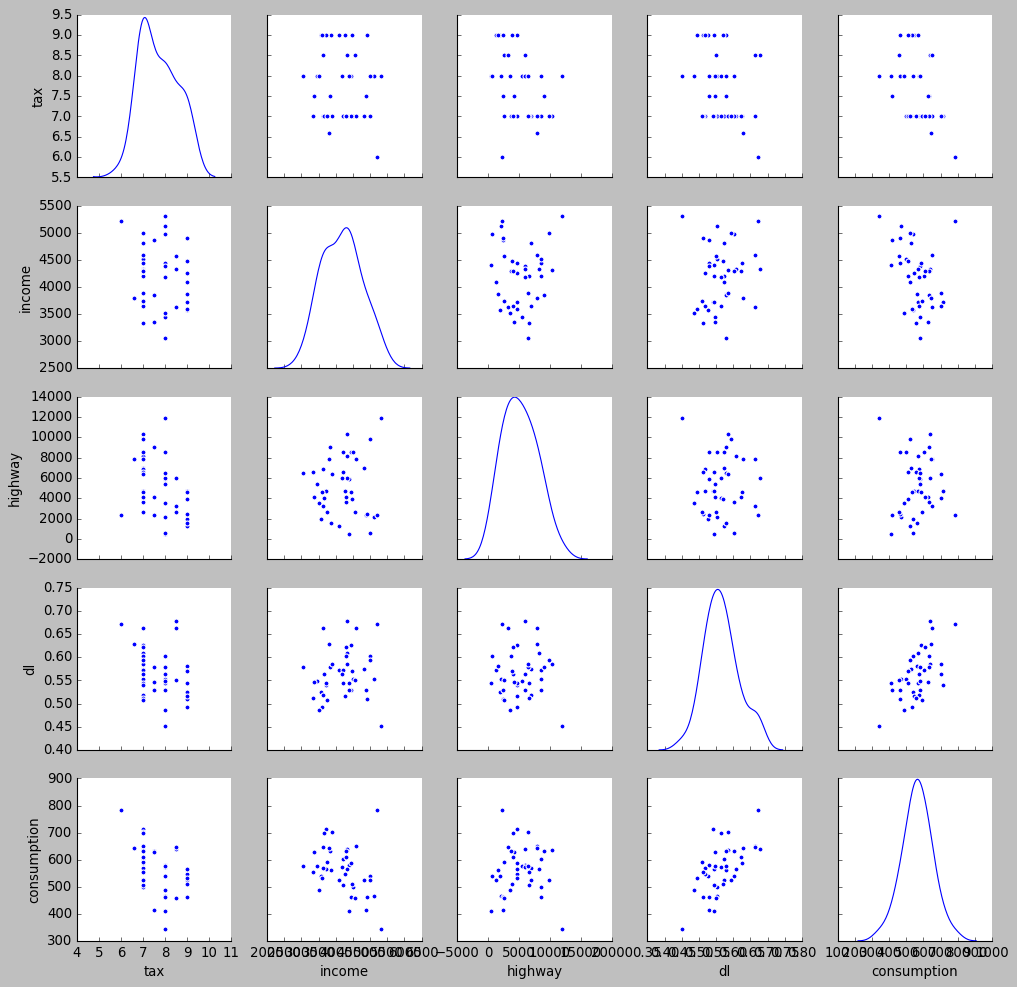

In [212]:
sns.pairplot(df_out, diag_kind='kde')

In [ ]:
#Observing the above correlation values between all the variables, we can see that there is stronger association
#between the number of drivers and consumption. And comparatively tax has an association in a negative way.
#Insights : As tax increases the consumption decreases. As number of drivers is more consumption is more

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [213]:
df_out
#print(df_out.columns)
X = df_out[['tax','dl']]
#X.remove('income',axis=1)
#X=X.filter(['dl','tax'],axis=1)
#Y=df_out.iloc[:,4:5]
Y=df_out[['consumption']]
print(X)
print(Y)


     tax     dl
0   9.00  0.525
1   9.00  0.572
2   9.00  0.580
3   7.50  0.529
4   8.00  0.544
6   8.00  0.451
7   8.00  0.553
8   8.00  0.529
9   7.00  0.552
10  8.00  0.530
12  7.00  0.574
13  7.00  0.545
14  7.00  0.608
15  7.00  0.586
16  7.00  0.572
17  7.00  0.540
19  8.50  0.677
20  7.00  0.663
21  8.00  0.602
22  9.00  0.511
23  9.00  0.517
24  8.50  0.551
25  9.00  0.544
26  8.00  0.548
27  7.50  0.579
28  8.00  0.563
29  9.00  0.493
30  7.00  0.518
31  7.00  0.513
32  8.00  0.578
33  7.50  0.547
34  8.00  0.487
35  6.58  0.629
37  7.00  0.586
38  8.50  0.663
40  7.00  0.626
41  7.00  0.563
42  7.00  0.603
43  7.00  0.508
44  6.00  0.672
45  9.00  0.571
46  7.00  0.623
47  7.00  0.593
    consumption
0           541
1           524
2           561
3           414
4           410
6           344
7           467
8           464
9           498
10          580
12          525
13          508
14          566
15          635
16          603
17          714
19          640
20      

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [179]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)
print("X_train shape : ",X_train.shape)
print("Y_train shape : ",Y_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (34, 2)
Y_train shape :  (34, 1)
X_test shape :  (9, 2)
Y_test shape :  (9, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [215]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The coefficient for for tax is -30.709242547547255
The coefficient for for dl is 892.8862087487333
The intercept for our model is 292.55096524614885


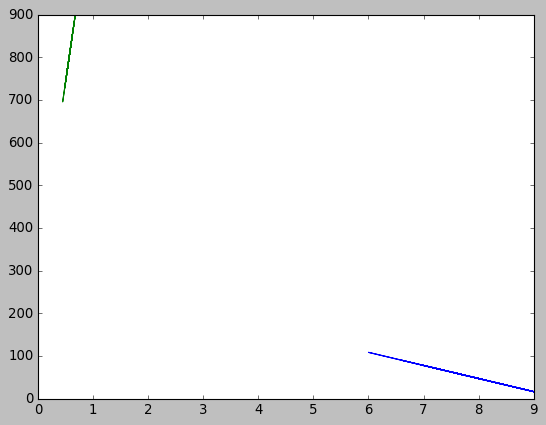

In [216]:
import matplotlib.pyplot as plt
plt.plot(X,regression_model.coef_[0]*X+intercept)

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [217]:
print("Score for X_train, Y_train :  ",regression_model.score(X_train, Y_train))

Score for X_train, Y_train :   0.4657867429910154


In [218]:
print("Score for X_test, Y_test :  ",regression_model.score(X_test, Y_test))

Score for X_test, Y_test :   0.2876056314158517


In [220]:
import numpy as np
from sklearn.metrics import mean_squared_error
Y_pred=regression_model.predict(X_test)
lin_mse = mean_squared_error(Y_pred, Y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression MSE: %.4f' % lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression MSE: 4764.2473
Liner Regression RMSE: 69.0235


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [221]:
df_out
X = df_out[['tax','income','highway','dl']]
Y=df_out[['consumption']]
print(X)
print(Y)

     tax  income  highway     dl
0   9.00    3571     1976  0.525
1   9.00    4092     1250  0.572
2   9.00    3865     1586  0.580
3   7.50    4870     2351  0.529
4   8.00    4399      431  0.544
6   8.00    5319    11868  0.451
7   8.00    5126     2138  0.553
8   8.00    4447     8577  0.529
9   7.00    4512     8507  0.552
10  8.00    4391     5939  0.530
12  7.00    4817     6930  0.574
13  7.00    4207     6580  0.545
14  7.00    4332     8159  0.608
15  7.00    4318    10340  0.586
16  7.00    4206     8508  0.572
17  7.00    3718     4725  0.540
19  8.50    4341     6010  0.677
20  7.00    4593     7834  0.663
21  8.00    4983      602  0.602
22  9.00    4897     2449  0.511
23  9.00    4258     4686  0.517
24  8.50    4574     2619  0.551
25  9.00    3721     4746  0.544
26  8.00    3448     5399  0.548
27  7.50    3846     9061  0.579
28  8.00    4188     5975  0.563
29  9.00    3601     4650  0.493
30  7.00    3640     6905  0.518
31  7.00    3333     6594  0.513
32  8.00  

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)
print("X_train shape : ",X_train.shape)
print("Y_train shape : ",Y_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (34, 4)
Y_train shape :  (34, 1)
X_test shape :  (9, 4)
Y_test shape :  (9, 1)


In [224]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
print("Score for X_train, Y_train :  ",regression_model.score(X_train, Y_train))

Score for X_train, Y_train :   0.640762294132101


In [226]:
print("Score for X_test, Y_test :  ",regression_model.score(X_test, Y_test))

Score for X_test, Y_test :   0.6930212207091794


In [227]:
import numpy as np
from sklearn.metrics import mean_squared_error
Y_pred=regression_model.predict(X_test)
lin_mse = mean_squared_error(Y_pred, Y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression MSE: %.4f' % lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression MSE: 2052.9680
Liner Regression RMSE: 45.3097


In [ ]:
#R2 has come down after adding the two other attributes

# Question 9: Print the coefficients of the multilinear regression model

In [228]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The coefficient for for tax is -39.4115836214154
The coefficient for for income is -0.06262814005687865
The coefficient for for highway is -0.0030219870395790313
The coefficient for for dl is 950.882744143078
The intercept for our model is 607.7189089086926


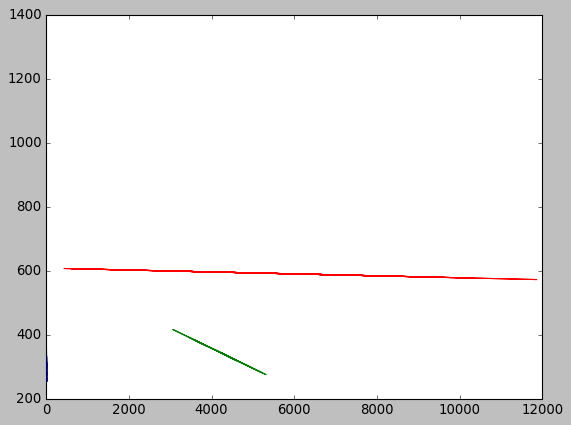

In [203]:
import matplotlib.pyplot as plt
plt.plot(X,regression_model.coef_[0]*X+intercept)

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
# The finding in this case is when we increased the number of attributes, the R2 value decreased. Not sure why that happened. 
#Need more clarity on this during classroom session